# <div style = 'background-color:gray'> <center>Data Science en el Sector Bancario: Pr√©stamos Personales</div>
---

#### An√°lisis de regresi√≥n aplicado a un conjunto de datos obtenidos de Kaggle, los cuales provienen de un web scraping realizado a un sitio argentino de clasificados. Los datos incluyen diversas caracter√≠sticas de autom√≥viles correspondientes a enero de 2023. El objetivo del estudio es predecir el precio de un autom√≥vil determinado en funci√≥n de sus caracter√≠sticas.

Como se componen los datos

- money: the number of prices
- brand: the brand of the car
- model: the model of the car
- year: the year of the car
- color: the color of the car
- fuel_type: the fuel type of the car
- door: the door of the car
- gear: the gear type of the car
- motor: the motor type of the car
- body_type: the body type of the car
- kilometers: the kilometer of the car
- currency: the currency of the price of car

## <div style = 'background-color:black'> <center><font color='white'>‚ë† Preparaci√≥n y limpieza de los datos </font></div>
Se parte con la preparaci√≥n del conjunto de datos para el modelado para garantizar que la informaci√≥n sea coherente, completa y utilizable. Se incluyen tareas:

- Tratamiento de valores faltantes.
- Codificaci√≥n de variables categ√≥ricas.
- Escalado o normalizaci√≥n de variables num√©ricas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('argentina_cars.csv')
df.head(3)

money   brand          model  year        color fuel_type  door  \
0  10350000  Toyota  Corolla Cross  2022     Plateado     Nafta   5.0   
1  10850000    Jeep        Compass  2022       Blanco     Nafta   5.0   
2     35500    Jeep        Compass  2022  Gris oscuro     Nafta   5.0   

         gear motor body_type  kilometres currency  
0  Autom√°tica   NaN       SUV         500    pesos  
1  Autom√°tica   2.4       SUV         500    pesos  
2  Autom√°tica   2.4       SUV         500  d√≥lares

In [3]:
headers = ["Precio", "Marca", "Modelo", "A√±o", "Color", "Combustible", "Puertas", "Transmision", "Motor", "Carroceria", "Km", "Moneda"]
df.columns = headers

In [4]:
df.head()

Precio    Marca         Modelo   A√±o        Color Combustible  Puertas  \
0  10350000   Toyota  Corolla Cross  2022     Plateado       Nafta      5.0   
1  10850000     Jeep        Compass  2022       Blanco       Nafta      5.0   
2     35500     Jeep        Compass  2022  Gris oscuro       Nafta      5.0   
3     19000  Citro√´n      C4 Cactus  2022  Gris oscuro       Nafta      5.0   
4   5800000   Toyota        Corolla  2019         Gris       Nafta      4.0   

  Transmision Motor Carroceria    Km   Moneda  
0  Autom√°tica   NaN        SUV   500    pesos  
1  Autom√°tica   2.4        SUV   500    pesos  
2  Autom√°tica   2.4        SUV   500  d√≥lares  
3  Autom√°tica   NaN        SUV   550  d√≥lares  
4      Manual   1.8      Sed√°n  9000    pesos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio       510 non-null    int64  
 1   Marca        510 non-null    object 
 2   Modelo       510 non-null    object 
 3   A√±o          510 non-null    int64  
 4   Color        499 non-null    object 
 5   Combustible  510 non-null    object 
 6   Puertas      510 non-null    float64
 7   Transmision  509 non-null    object 
 8   Motor        499 non-null    object 
 9   Carroceria   509 non-null    object 
 10  Km           510 non-null    int64  
 11  Moneda       510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


In [6]:
df.isnull().sum() # Para ver cuantos datos faltan y determinar en que columna estan.

Precio          0
Marca           0
Modelo          0
A√±o             0
Color          11
Combustible     0
Puertas         0
Transmision     1
Motor          11
Carroceria      1
Km              0
Moneda          0
dtype: int64

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns].head(24))
# Con esta sentencia veo que datos son los que estan nulos (NAN), como son pocos en realidad le pido que me muestre
# los 24 valores asi analizo y veo que hacer si rellenar o borrar los datos faltantes.

           Color Transmision         Motor   Carroceria
0       Plateado  Autom√°tica           NaN          SUV
3    Gris oscuro  Autom√°tica           NaN          SUV
12      Plateado      Manual           NaN        Sed√°n
14         Negro  Autom√°tica           NaN    Hatchback
16          Gris  Autom√°tica           NaN          SUV
24         Negro      Manual           NaN    Hatchback
31         Negro      Manual           NaN      Pick-Up
34          Rojo      Manual           NaN    Hatchback
55          Gris      Manual           NaN        Coup√©
56        Blanco  Autom√°tica           NaN        Sed√°n
208          NaN      Manual           4.4          SUV
211        Negro         NaN  2.8tdi 223cv      Pick-Up
231          NaN  Autom√°tica           1.8        Sed√°n
256          NaN      Manual           2.0        Sed√°n
278         Rojo      Manual           NaN          NaN
290          NaN      Manual           1.6        Sed√°n
295          NaN      Manual        

In [8]:
# Hay muchos valores nulos, para no optar por borrarlos del dataset, elijo hacer un rellenado manual segun lo que es mas
# habitual en cada caracteristica.

df['Color'] = df['Color'].fillna("Gris") # En este caso lleno con el color mas comun.
df['Transmision'] = df['Transmision'].fillna("Manual") # En este caso lleno con el tipo de transmisi√≥n mas com√∫n.
df['Motor'] = df['Motor'].fillna(1.6) # Aqui relleno con el tipo de motor m√°s vendido o usado
df['Carroceria'] = df['Carroceria'].fillna("Sedan")

In [9]:
df.isnull().sum()
# Vuelvo a pasar esta sentencia para verificar que ya no hay valores NAN (Not A Number)

Precio         0
Marca          0
Modelo         0
A√±o            0
Color          0
Combustible    0
Puertas        0
Transmision    0
Motor          0
Carroceria     0
Km             0
Moneda         0
dtype: int64

In [10]:
df.sample(3)

Precio       Marca   Modelo   A√±o   Color Combustible  Puertas  \
127   2700000     Renault  Sandero  2018   Negro       Nafta      5.0   
173   3689900  Volkswagen     Polo  2017  Dorado       Nafta      4.0   
358  11195000  Volkswagen     Golf  2019  Blanco       Nafta      5.0   

    Transmision Motor Carroceria     Km Moneda  
127      Manual   1.6  Hatchback  44000  pesos  
173  Autom√°tica   1.6  Hatchback  45000  pesos  
358  Autom√°tica   2.0  Hatchback  58000  pesos

## <div style = 'background-color:black'> <center><font color='white'>‚ë° Analisis exploratorio de los datos (EDA) </font></div>
Se examinara la estructura del dataset para ver las variables disponibles.  
En esta etapa se buscara:
- Conocer la cantidad de registros y variables.  
- Identificar valores nulos o duplicados.  
- Revisar tipos de datos.  
- Obtener estad√≠sticas descriptivas b√°sicas.  
- Visualizar relaciones entre las variables mediante gr√°ficos.

In [11]:
df.Marca.value_counts()

Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           47
Renault          45
Citro√´n          32
Fiat             25
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Nissan            8
Audi              8
RAM               6
Dodge             4
Kia               3
Volvo             2
DS                2
Mitsubishi        2
Mini              2
Porsche           1
Chery             1
Suzuki            1
Subaru            1
Baic              1
Name: Marca, dtype: int64

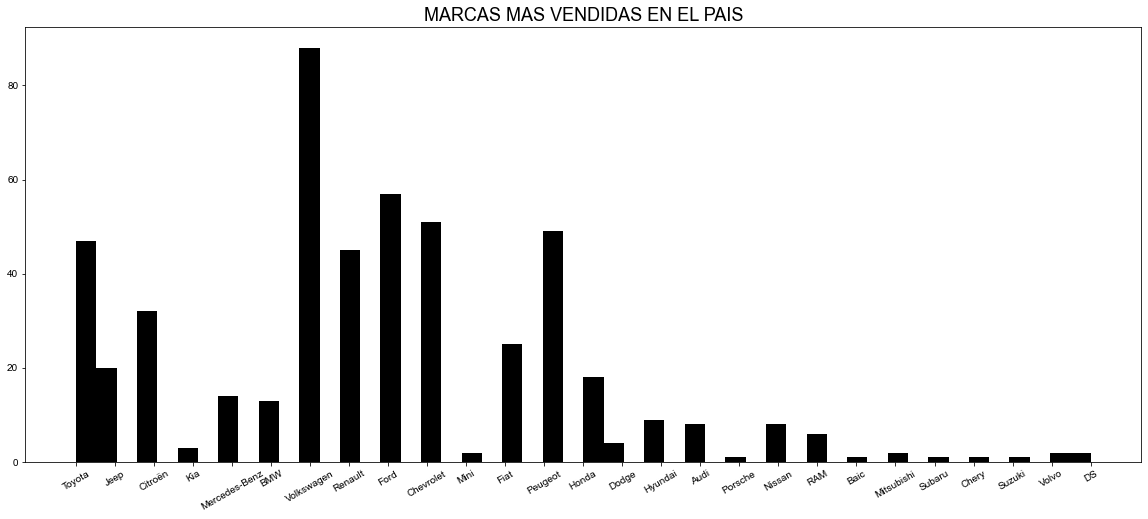

<Figure size 576x396 with 0 Axes>

In [12]:
df['Marca'].hist(bins=50, color='black') # Vemos graficamente su distribuci√≥n
plt.title('MARCAS MAS VENDIDAS EN EL PAIS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 8)  # Tama√±o de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [13]:
df.Combustible.value_counts()

Nafta            416
Di√©sel            72
Nafta/GNC         19
H√≠brido/Nafta      3
Name: Combustible, dtype: int64

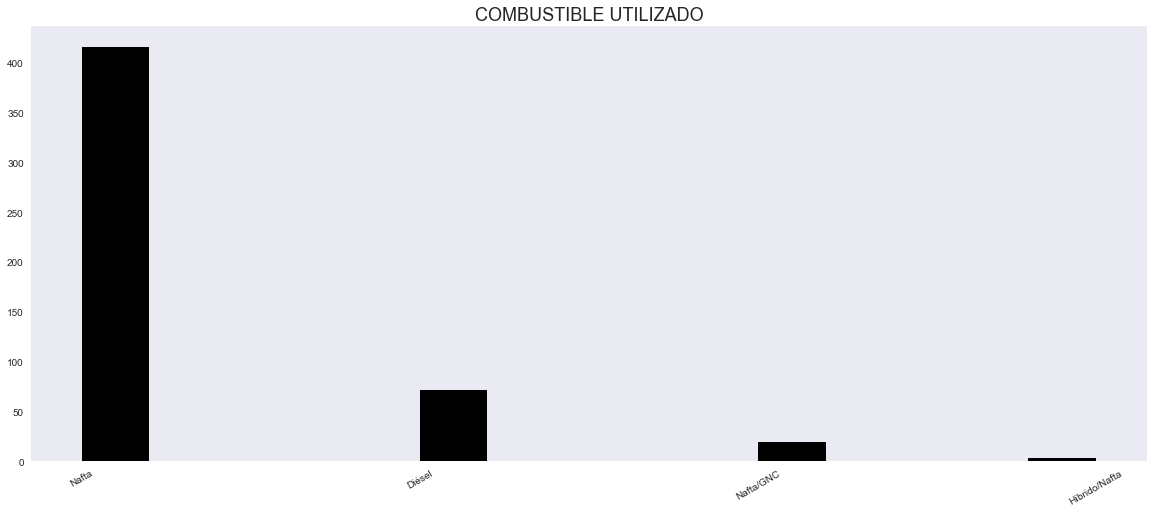

<Figure size 576x396 with 0 Axes>

In [14]:
df['Combustible'].hist(bins=15, color='black') # Vemos graficamente su distribuci√≥n
plt.title('COMBUSTIBLE UTILIZADO', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 8)  # Tama√±o de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [15]:
df.Carroceria.value_counts()

Hatchback      184
SUV            130
Sed√°n           98
Pick-Up         55
Monovolumen     18
Coup√©           11
Furg√≥n           8
Rural            3
Minivan          1
Sedan            1
Crossover        1
Name: Carroceria, dtype: int64

In [16]:
# En este caso hay 3 tipos de carroceria que voy a eliminar y agregar en otras mas representativas.
df.Carroceria = df.Carroceria.replace(["Sedan"], "Sed√°n")
df.Carroceria = df.Carroceria.replace(["Minivan", "Crossover"], "SUV")

In [17]:
# Vuelvo para ver como quedan los valores de esa columna.
df.Carroceria.value_counts()

Hatchback      184
SUV            132
Sed√°n           99
Pick-Up         55
Monovolumen     18
Coup√©           11
Furg√≥n           8
Rural            3
Name: Carroceria, dtype: int64

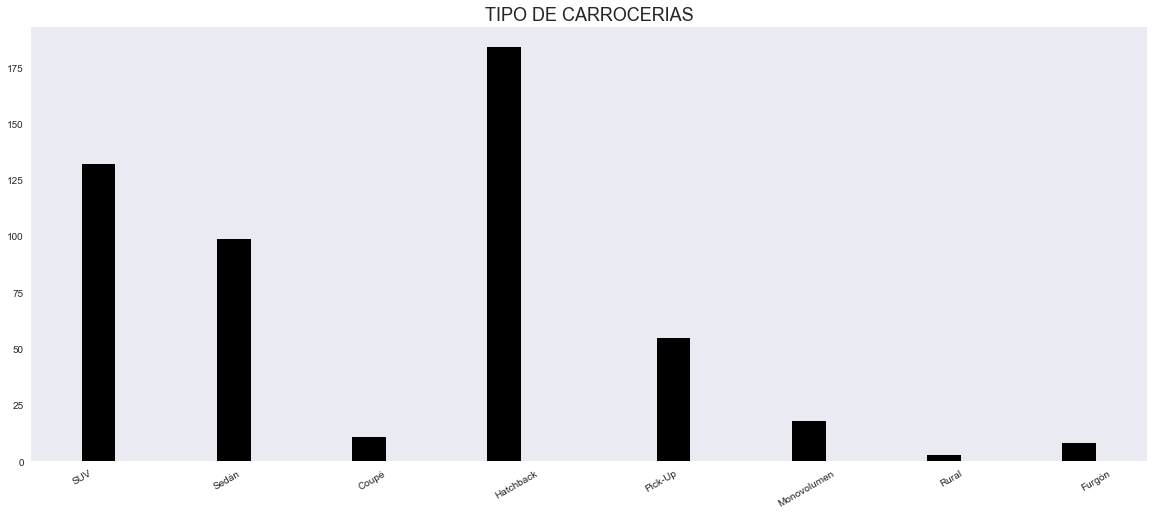

<Figure size 576x396 with 0 Axes>

In [18]:
df['Carroceria'].hist(bins=30, color='black') # Vemos graficamente su distribuci√≥n
plt.title('TIPO DE CARROCERIAS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 8)  # Tama√±o de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [19]:
df.Color.value_counts()

Gris           169
Blanco         150
Negro           60
Plateado        53
Azul            25
Rojo            24
Dorado           8
Violeta          4
Marr√≥n           4
Celeste          4
Gris oscuro      3
Naranja          3
Verde            2
Beige            1
Name: Color, dtype: int64

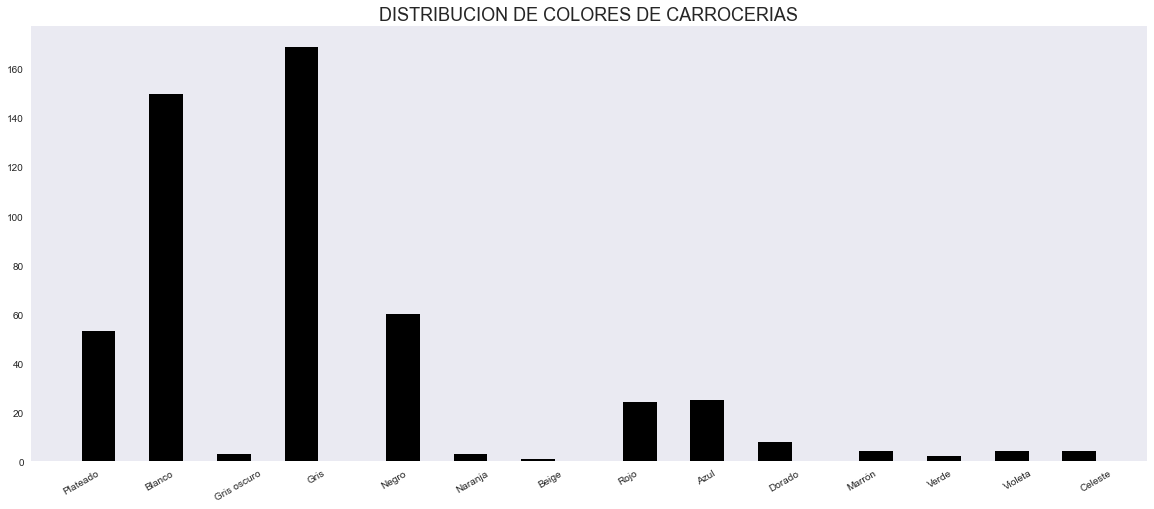

<Figure size 576x396 with 0 Axes>

In [20]:
df['Color'].hist(bins=30, color='black') # Vemos graficamente su distribuci√≥n
plt.title('DISTRIBUCION DE COLORES DE CARROCERIAS', fontsize=18)
plt.grid(False)

plt.gcf().set_size_inches(20, 8)  # Tama√±o de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [21]:
df.corr()

Precio       A√±o   Puertas        Km
Precio   1.000000  0.428133  0.070264 -0.219567
A√±o      0.428133  1.000000  0.083977 -0.679453
Puertas  0.070264  0.083977  1.000000 -0.078398
Km      -0.219567 -0.679453 -0.078398  1.000000

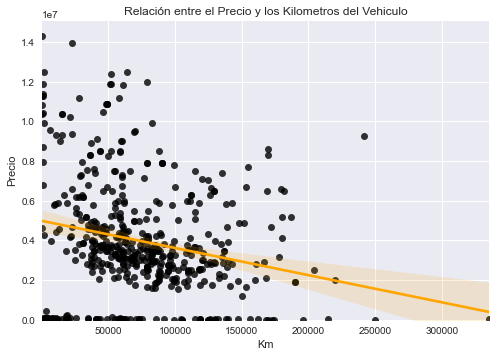

In [22]:
sns.regplot(x="Km", y="Precio", data=df, line_kws={"color": "orange"}, scatter_kws={"color": "black"})
plt.ylim(0,)
plt.title("Relaci√≥n entre el Precio y los Kilometros del Vehiculo")
sns.set_style("whitegrid") # Fondo con cuadr√≠cula

plt.savefig("argentina_cars.png")  #Aca guardo el grafico en una imagen para volver a usarlo sin modificaciones mas abajo
plt.show()

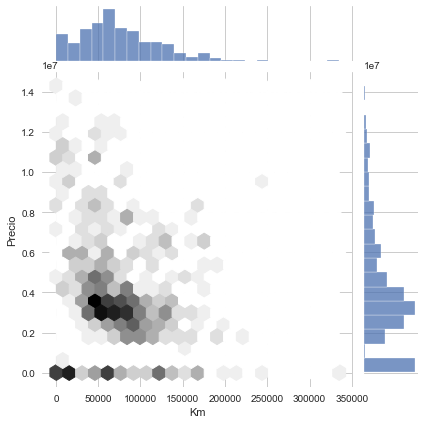

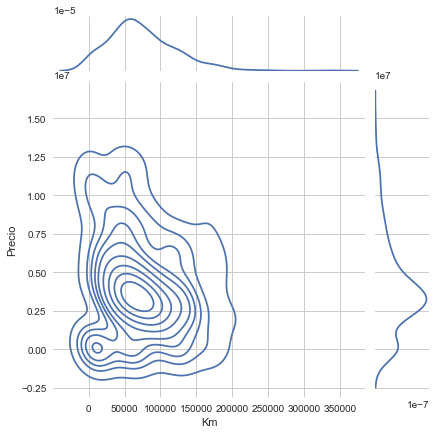

In [23]:
# Graficos para ver bien la relaci√≥n entre 2 variables y al mismo tiempo mostrar la distribuci√≥n de cada variable por separado.
sns.jointplot(x="Km", y="Precio", data=df, kind="hex", cmap="gist_yarg")
plt.show()

sns.jointplot(x="Km", y="Precio", data=df, kind="kde") # Crea un mapa de calor que indica donde se concentran mas los autos.
plt.show()


## <div style = 'background-color:black'> <center><font color='white'>‚ë¢ Modelado y evaluaci√≥n </font></div>
  
Aca intentare buscar el mejor modelo de regresi√≥n con el objetivo de predecir el precio de un automovil de acuerdo a sus caracteristicas, partiendo de lo mas simple a los algoritmos mas complejos.

Modelos posibles:

- Regresi√≥n Lineal
- Regresi√≥n Polinomica
- Gradient Boosting
- XGBoost

Se eval√∫an utilizando m√©tricas como:

- Mean Scuared Error (Error cuadr√°tico medio)

## ‚ùë Regresi√≥n Lineal

Si bien la relaci√≥n entre los kil√≥metros recorridos y el precio del veh√≠culo resulta evidente, a modo de demostraci√≥n y pr√°ctica se realiza el c√°lculo de una regresi√≥n lineal considerando estas variables

In [24]:
# Regresi√≥n lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [25]:
X = df[['Km']]
Y = df['Precio']

In [26]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [27]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([4983153.12497787, 4983153.12497787, 4983153.12497787,
       4982468.10030982, 4866698.93140833])

In [28]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra este valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  4990003.371658436 o lo que es lo mismo, cuando X=0, Y tendra este valor
Coeficiente:  [-13.70049336]


<div class="alert alert-warning">Sera una regresi√≥n lineal con la formula Y=a+bX, donde a=intercept y donde b=coef

Que seria como decir
Y = 4990003.37 - 13.9663xBeneficio/Acciones

Con esta formula podremos predecir el precio
</div>

In [29]:
# Pido predecir el modelo de regresi√≥n lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)


array([4983153.12497787, 4983153.12497787, 4983153.12497787,
       4982468.10030982, 4866698.93140833, 4846148.19136665,
       2852726.40732326, 2606117.52682305, 4085770.80982432,
       4510486.10401913, 4231078.24241239, 2769427.40768764,
       3467727.85381071, 3467727.85381071, 4513226.20269136,
       3606253.54218502, 3989867.35629646, 3852862.42268524,
       3633654.52890727, 2523914.56665631, 3893963.9027686 ,
       3551451.56874053, 3921364.88949085, 2660919.50026754,
       3291142.1948792 , 4154273.27662994, 4469384.62393577,
       2523914.56665631, 4236476.23679668, 3688456.50235176,
       2432121.26113679, 4702293.01107485, 3482949.10193492,
       4140572.78326882, 4058369.82310208, 3277441.70151807,
       4455684.13057464, 2976030.84757337, 4113171.79654657,
       3756958.96915738, 4674892.02435261, 3852862.42268524,
       3633654.52890727, 3962466.36957422, 4209075.25007443,
       3647355.02226839, 3825461.43596299, 4983016.12004426,
       4387181.66376903,

(0.0, 15070417.415119803)

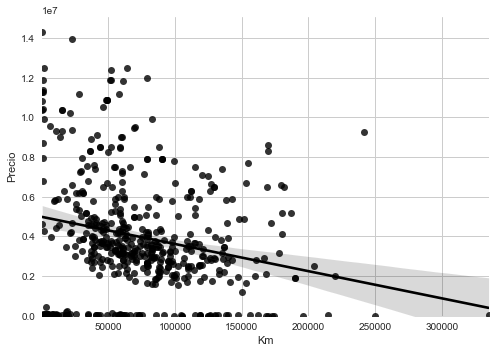

In [30]:
sns.regplot (x="Km", y="Precio", data=df, color="black")
plt.ylim (0, )

Luego se compara Yhat (los valores estimados por el modelo) con los valores reales para determinar qu√© tan bien se ajusta la regresi√≥n a los datos.

<div class="alert alert-warning">El Mean Squared Error (MSE) mide la diferencia promedio entre los valores reales y los valores predichos por el modelo.

Para cada observaci√≥n, se calcula la diferencia entre el valor real y el valor estimado, y luego esa diferencia se eleva al cuadrado para eliminar los signos negativos y penalizar los errores grandes.

Por ejemplo, si el valor real es 150 y la predicci√≥n del modelo es 50, la diferencia es 
150 ‚àí 50 = 100. Al elevarla al cuadrado, obtenemos 100¬≤ = 10.000

Finalmente, se calcula el promedio de todos esos errores al cuadrado.

Cuanto menor sea el MSE, mejor se ajusta el modelo a los datos, ya que indica que las predicciones est√°n m√°s cerca de los valores reales.
</div>

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  8090860395338.652


<div class="alert alert-warning">El valor obtenido del MSE, 8.090.860.395.338,652, es extremadamente elevado. Esto indica que existe una gran discrepancia entre los valores reales de df['Precio'] y las predicciones generadas por el modelo (Yhat). En consecuencia, el modelo no logra un buen ajuste a los datos, presentando errores de predicci√≥n considerables.
</div>


---
**Interpretaci√≥n del MSE:**

MSE alto

Indica que el modelo tiene un mal desempe√±o.

Los errores entre los valores reales y los predichos son muy grandes.

Esto puede deberse a:

- Un modelo que no se ajusta bien a los datos.

- Datos con mucha variabilidad o ruido.

- Variables independientes que no tienen una relaci√≥n lineal con la variable dependiente.

MSE bajo

- Indica que el modelo tiene un buen desempe√±o.

- Los errores entre los valores reales y los predichos son peque√±os.

---
Esto se debe en principio a que en los datos hay una columna que esta expresada en pesos y otra en dolares, asi que procedo
a modificar esta columna para expresar todo en una sola moneda, pasando a dolares todos los valores que no lo esten, utilizando
de modo arbitrario un tipo de cambio de $1200 por cada dolar, aproximadamente acorde a lo que en este momento cotiza en el pais.
---

In [33]:
# Como estan actualmente los datos
df.head(3)

Precio   Marca         Modelo   A√±o        Color Combustible  Puertas  \
0  10350000  Toyota  Corolla Cross  2022     Plateado       Nafta      5.0   
1  10850000    Jeep        Compass  2022       Blanco       Nafta      5.0   
2     35500    Jeep        Compass  2022  Gris oscuro       Nafta      5.0   

  Transmision Motor Carroceria   Km   Moneda  
0  Autom√°tica   1.6        SUV  500    pesos  
1  Autom√°tica   2.4        SUV  500    pesos  
2  Autom√°tica   2.4        SUV  500  d√≥lares

In [34]:
df.loc[df["Moneda"] == "pesos", "Precio"] = df["Precio"] / 1200 #Tomo solo los valores en pesos y los convierto a dolares
df.loc[df["Moneda"] == "pesos", "Moneda"] = "d√≥lares" # Cambia el valor en la columna "Moneda" para reflejar que esta en dolares

In [35]:
# Ver el resultado, figura expresado en dolares pero con muchos decimales que dificulta ver y entender bien los valores
df.head(3) 


Precio   Marca         Modelo   A√±o        Color Combustible  \
0   8625.000000  Toyota  Corolla Cross  2022     Plateado       Nafta   
1   9041.666667    Jeep        Compass  2022       Blanco       Nafta   
2  35500.000000    Jeep        Compass  2022  Gris oscuro       Nafta   

   Puertas Transmision Motor Carroceria   Km   Moneda  
0      5.0  Autom√°tica   1.6        SUV  500  d√≥lares  
1      5.0  Autom√°tica   2.4        SUV  500  d√≥lares  
2      5.0  Autom√°tica   2.4        SUV  500  d√≥lares

In [36]:
df["Precio"] = df["Precio"].round(0).astype(int) # Para eliminar los decimales

In [37]:
df.head(3)

Precio   Marca         Modelo   A√±o        Color Combustible  Puertas  \
0    8625  Toyota  Corolla Cross  2022     Plateado       Nafta      5.0   
1    9042    Jeep        Compass  2022       Blanco       Nafta      5.0   
2   35500    Jeep        Compass  2022  Gris oscuro       Nafta      5.0   

  Transmision Motor Carroceria   Km   Moneda  
0  Autom√°tica   1.6        SUV  500  d√≥lares  
1  Autom√°tica   2.4        SUV  500  d√≥lares  
2  Autom√°tica   2.4        SUV  500  d√≥lares

In [38]:
df.corr()

Precio       A√±o   Puertas        Km
Precio   1.000000  0.145336 -0.290603 -0.224759
A√±o      0.145336  1.000000  0.083977 -0.679453
Puertas -0.290603  0.083977  1.000000 -0.078398
Km      -0.224759 -0.679453 -0.078398  1.000000

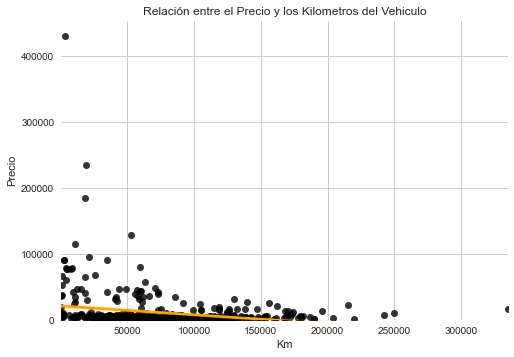

In [39]:
sns.regplot(x="Km", y="Precio", data=df, line_kws={"color": "orange"}, scatter_kws={"color": "black"})
plt.ylim(0,)
plt.title("Relaci√≥n entre el Precio y los Kilometros del Vehiculo")
sns.set_style("whitegrid") # Fondo con cuadr√≠cula

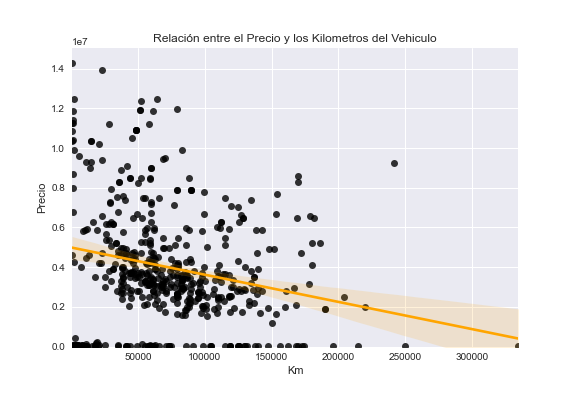

In [40]:
from IPython.display import display
from PIL import Image

# Cargar y mostrar la imagen guardada
img = Image.open("argentina_cars.png")
display(img)

Como puede observarse en los dos √∫ltimos gr√°ficos, el primero presenta los valores ya normalizados y expresados en d√≥lares, mientras que el segundo se incluye con el prop√≥sito de comparar la distribuci√≥n de los datos antes del proceso de normalizaci√≥n.

In [41]:
# Regresi√≥n lineal (vuelvo a calcular con datos corregidos)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [42]:
X = df[['Km']]
Y = df['Precio']

In [43]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [44]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([20945.24071138, 20945.24071138, 20945.24071138, 20938.53694   ,
       19805.59957523])

In [45]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  21012.278425276272 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-0.13407543]


In [46]:
# Pido predecir el modelo de regresi√≥n lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 20945.24071138,  20945.24071138,  20945.24071138,  20938.53694   ,
        19805.59957523,  19604.48643356,     96.5116912 ,  -2316.84600889,
        12163.30019163,  16319.63845289,  13585.30417869,   -718.66690972,
         6115.02356893,   6115.02356893,  16346.45353844,   7470.66021924,
        11224.77219715,   9884.01791932,   7738.8110748 ,  -3121.29857558,
        10286.24420267,   6934.35850811,  10554.39505824,  -1780.54429776,
         4386.92538024,  12833.67733054,  15917.41216954,  -3121.29857558,
        13638.12989724,   8275.11278593,  -4019.60394173,  18196.69444184,
         6263.9813692 ,  12699.60190276,  11895.14933606,   4252.84995246,
        15783.33674176,   1303.19054124,  12431.45104719,   8945.48992485,
        17928.54358628,   9884.01791932,   7738.8110748 ,  10956.62134159,
        13369.97904167,   7872.88650259,   9615.86706376,  20943.89995711,
        15112.95960284,  13906.2807528 ,  13008.24353751,  12940.66952191,
        19671.52414745,  

In [47]:
# Ahora evaluo los resultados
from sklearn.metrics import mean_squared_error

In [48]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  737676895.8393358


<div class="alert alert-warning">Si bien el error cuadr√°tico medio disminuy√≥ tras la correcci√≥n, su valor sigue siendo considerablemente alto. Esto indica que el modelo contin√∫a presentando un desempe√±o deficiente y no resulta adecuado para aplicarse a este conjunto de datos
</div>

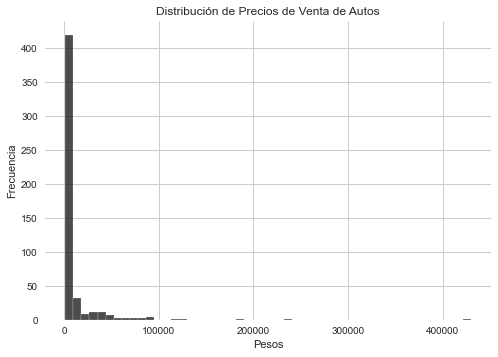

In [49]:
plt.hist(df['Precio'], bins=50, color='black', alpha=0.7)
plt.xlabel('Pesos')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Precios de Venta de Autos')
plt.show()

In [50]:
df.head(100)

Precio       Marca         Modelo   A√±o        Color Combustible  Puertas  \
0     8625      Toyota  Corolla Cross  2022     Plateado       Nafta      5.0   
1     9042        Jeep        Compass  2022       Blanco       Nafta      5.0   
2    35500        Jeep        Compass  2022  Gris oscuro       Nafta      5.0   
3    19000     Citro√´n      C4 Cactus  2022  Gris oscuro       Nafta      5.0   
4     4833      Toyota        Corolla  2019         Gris       Nafta      4.0   
..     ...         ...            ...   ...          ...         ...      ...   
95    4908      Toyota          Yaris  2021       Blanco       Nafta      5.0   
96   78500         RAM           1500  2022         Gris       Nafta      4.0   
97    6292  Volkswagen          Nivus  2021       Blanco       Nafta      5.0   
98    2992     Renault        Sandero  2018         Gris       Nafta      5.0   
99    5158     Renault   Duster Oroch  2021        Negro       Nafta      4.0   

   Transmision Motor Carroceria     Km   Moneda  
0   Autom√°tica   1.6        SUV    500  d√≥lares  
1   Autom√°tica   2.4        SUV    500  d√≥lares  
2   Autom√°tica   2.4        SUV    500  d√≥lares  
3   Autom√°tica   1.6        SUV    550  d√≥lares  
4       Manual   1.8      Sed√°n   9000  d√≥lares  
..         ...   ...        ...    ...      ...  
95  Autom√°tica   1.5  Hatchback  19000  d√≥lares  
96  Autom√°tica   5.7    Pick-Up   8300  d√≥lares  
97  Autom√°tica   1.0        SUV  34000  d√≥lares  
98      Manual   1.6  Hatchback  57000  d√≥lares  
99      Manual   2.0        SUV  26000  d√≥lares  

[100 rows x 12 columns]

Como se puede observar en el ultimo grafico mostrado y en el dataframe arriba impreso, los precios de los autos con menor valor de venta son los que mas frecuentemente se negocian y que las ventas de autos mas caros son pocos en realidad y con precios muy altos.

Voy a intentar mejorar el modelo incluyendo una variable mas para ver si mejoran las mediciones y poder utilizarlo. En el caso de este set de datos, una variable que deberia estar muy correlacionada al precio serian el a√±o de fabricacion.

In [51]:
X = df[['Km', "A√±o", "Puertas"]]
Y = df['Precio']

In [52]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [53]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([16095.43635927, 16095.43635927, 16095.43635927, 16088.08804019,
       26123.82394548])

In [54]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  12574.996292883647 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-1.46966382e-01  2.98863639e+01 -1.13672609e+04]


In [55]:
# Pido predecir el modelo de regresi√≥n lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 1.60954364e+04,  1.60954364e+04,  1.60954364e+04,  1.60880880e+04,
        2.61238239e+04,  1.46257725e+04, -6.99692690e+03,  1.54562097e+03,
        4.03916029e+04,  1.09354371e+04,  7.87843198e+03, -7.92036886e+03,
       -1.60662082e+02, -1.60662082e+02,  1.09947167e+04,  1.23638259e+04,
        5.35071460e+03,  3.76150533e+03,  1.38015685e+03, -1.06137792e+04,
        4.29206356e+03,  4.68472201e+02,  4.58599633e+03,  2.40246377e+03,
       -2.32388905e+03,  7.11431118e+03,  1.03451061e+04,  1.21805154e+04,
        1.94231431e+04,  1.33053969e+04, -1.15386812e+04,  2.44498865e+04,
       -3.26132435e+02,  6.90757207e+03,  5.99588741e+03, -2.56051452e+03,
        1.03475716e+04,  5.69303146e+03,  6.58375294e+03,  1.41000016e+04,
        1.27588064e+04,  3.76150533e+03,  2.40250196e+04,  4.99700911e+03,
        1.89498922e+04,  1.52712324e+03,  3.40779983e+03,  1.60939667e+04,
        9.49319421e+03,  8.26015587e+03,  1.86430360e+04,  7.20170399e+03,
        2.59768576e+04,  

In [56]:
# Ahora eval√∫o los resultados
from sklearn.metrics import mean_squared_error

In [57]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  663404475.7780166


<div class="alert alert-warning">Si bien se observa una mejora en el modelo, √©sta no resulta suficiente como para considerarlo adecuado. Por ello, se proceder√° a revisar y tratar el conjunto de datos, analizando la posible influencia de valores at√≠picos (outliers) que podr√≠an estar afectando los resultados del an√°lisis.
</div>

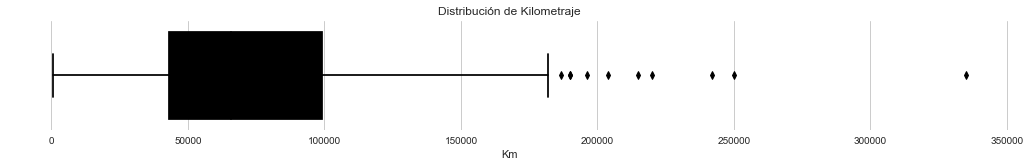

In [58]:
# Grafico para ver los outliers, son todos los puntos fuera del grafico (fuera del diagrama de caja)
plt.figure(figsize=(18, 2))  
sns.boxplot(x=df['Km'], color="black")
plt.title("Distribuci√≥n de Kilometraje")
plt.show()

Para tratar los valores extremos en los datos sin eliminarlos, se aplica la t√©cnica conocida como "Winsorization". Los outliers no se consideran errores, sino observaciones extremas que podr√≠an influir en el modelo.

En la sentencia siguiente se establecen los l√≠mites m√≠nimo y m√°ximo permitidos para los datos de kilometraje (0 y 170.000 km), de manera que los valores fuera de este rango se ajusten a estos extremos.

In [59]:
df['Km'] = df['Km'].clip(lower=0, upper=170000)

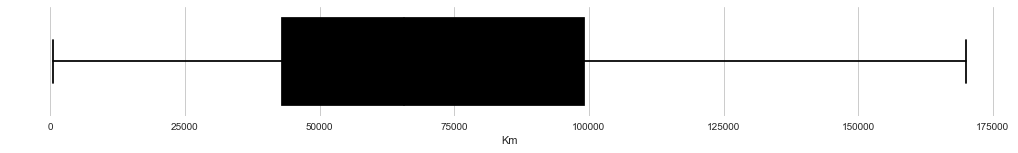

In [60]:
# Vuelvo a pasar la sentencia del grafico y se puede ver que ya no tiene outliers, pero a la vez no se borraron los datos.
plt.figure(figsize=(18, 2))  
sns.boxplot(x=df['Km'], color="black")
plt.show()

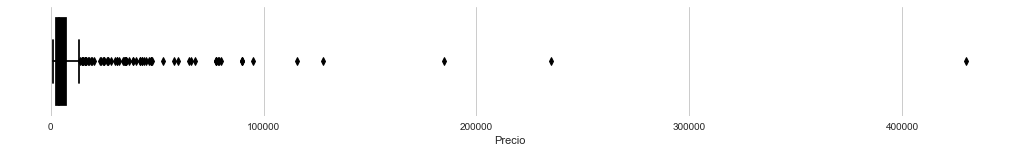

In [61]:
# Ahora con los valores de la columna "Precio". Ac√° tambi√©n grafico para ver los outliers de la columna "Precios", estos son
# todos los puntos fuera del grafico (los que estan por fuera del diagrama de caja).
plt.figure(figsize=(18, 2))  
sns.boxplot(x=df['Precio'], color="black")
plt.show()

In [62]:
df['Precio'] = df['Precio'].clip(lower=0, upper=180000) # Establezco los limites para el precio

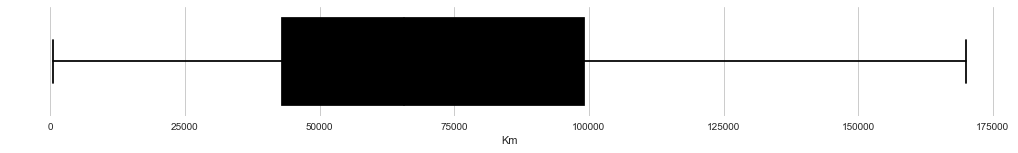

In [63]:
# Vuelvo a pasar la sentencia del grafico y se puede ver que ya no tiene outliers, pero a la vez no se borraron los datos.
plt.figure(figsize=(18, 2))  
sns.boxplot(x=df['Km'], color="Black")
plt.show()

Luego de trabajar con los outliers en los datos, se procede a seguir analizando

In [64]:
df.head(3)

Precio   Marca         Modelo   A√±o        Color Combustible  Puertas  \
0    8625  Toyota  Corolla Cross  2022     Plateado       Nafta      5.0   
1    9042    Jeep        Compass  2022       Blanco       Nafta      5.0   
2   35500    Jeep        Compass  2022  Gris oscuro       Nafta      5.0   

  Transmision Motor Carroceria   Km   Moneda  
0  Autom√°tica   1.6        SUV  500  d√≥lares  
1  Autom√°tica   2.4        SUV  500  d√≥lares  
2  Autom√°tica   2.4        SUV  500  d√≥lares

In [65]:
X = df[['Km', "A√±o", 'Puertas']]
Y = df['Precio']

In [66]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [67]:
Yhat=lm.predict(X)
Yhat[0:5] # Selecciona las primeras 5 predicciones de la matriz

array([16346.14228293, 16346.14228293, 16346.14228293, 16339.27869204,
       23450.21624862])

In [68]:
print ('Intercepcion: ',lm.intercept_, 'o lo que es lo mismo, cuando X=0, Y tendra ese valor')
print ('Coeficiente: ', lm.coef_)

Intercepcion:  -76716.43045134417 o lo que es lo mismo, cuando X=0, Y tendra ese valor
Coeficiente:  [-1.37271818e-01  6.70082864e+01 -8.47190928e+03]


In [69]:
# Pido predecir el modelo de regresi√≥n lineal (lm) previamente entrenado
Yhat=lm.predict(X)
lm.predict(X)

array([ 1.63461423e+04,  1.63461423e+04,  1.63461423e+04,  1.63392787e+04,
        2.34502162e+04,  1.49734241e+04, -5.53569166e+03,  6.12362444e+02,
        3.23685163e+04,  1.14092397e+04,  8.47570169e+03, -6.43731260e+03,
        1.16236925e+03,  1.16236925e+03,  1.15037024e+04,  1.02851427e+04,
        6.19291064e+03,  4.55215932e+03,  2.28880195e+03, -7.65852197e+03,
        5.16499963e+03,  1.39816275e+03,  5.43954326e+03,  1.21543702e+03,
       -1.21000178e+03,  7.84017245e+03,  1.06623828e+04,  9.41931315e+03,
        1.72697292e+04,  1.12427902e+04, -7.52450540e+03,  2.20039793e+04,
        5.77787092e+02,  7.56888406e+03,  6.67824487e+03, -1.54829846e+03,
        1.08601524e+04,  4.17166397e+03,  7.22733214e+03,  1.20631659e+04,
        1.31905181e+04,  4.55215932e+03,  1.90315956e+04,  5.78435043e+03,
        1.65931359e+04,  2.42607376e+03,  4.14359911e+03,  1.63447696e+04,
        9.90576021e+03,  8.87133871e+03,  1.64238013e+04,  7.88270708e+03,
        2.33129444e+04,  

In [70]:
mse = mean_squared_error(df['Precio'], Yhat)
print('El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es: ', mse)

El MSE (Error Cuadratico Medio) del precio y el valor que se predijo es:  367588770.76562


<div class="alert alert-warning">Tras corregir los outliers, el Mean Squared Error mejora significativamente; sin embargo, el valor a√∫n no es lo suficientemente bajo. Por ello, se proceder√° a probar otro algoritmo con el fin de continuar el an√°lisis del caso.</div>

## ‚ùë Regresi√≥n Polinomica

In [71]:
df.head(3)

Precio   Marca         Modelo   A√±o        Color Combustible  Puertas  \
0    8625  Toyota  Corolla Cross  2022     Plateado       Nafta      5.0   
1    9042    Jeep        Compass  2022       Blanco       Nafta      5.0   
2   35500    Jeep        Compass  2022  Gris oscuro       Nafta      5.0   

  Transmision Motor Carroceria   Km   Moneda  
0  Autom√°tica   1.6        SUV  500  d√≥lares  
1  Autom√°tica   2.4        SUV  500  d√≥lares  
2  Autom√°tica   2.4        SUV  500  d√≥lares

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = df[['Km']]  # Variable independiente
y = df['Precio']    # Variable dependiente

# Convertir a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crear modelo de regresi√≥n lineal (aunque se use regresion lineal, al aplicarlo sobre X_poly se obtiene una polin√≥mica)
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

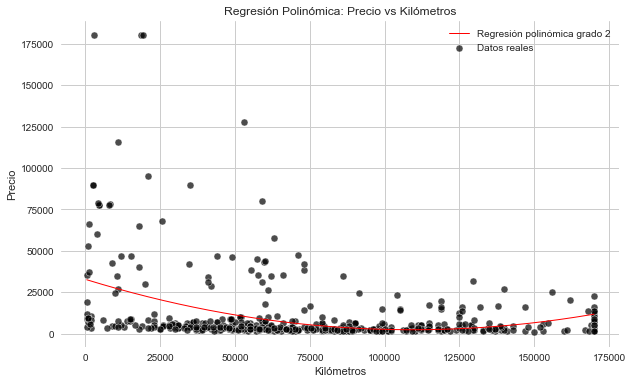

In [73]:
X_range = np.linspace(df['Km'].min(), df['Km'].max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)  # Transformar a polinomio

# Predecir precios usando el modelo polin√≥mico
y_pred = modelo.predict(X_range_poly)

# Graficar
plt.figure(figsize=(10,6))
sns.scatterplot(x='Km', y='Precio', data=df, color='black', alpha=0.7, label='Datos reales')
plt.plot(X_range, y_pred, color='red', linewidth=1, label='Regresi√≥n polin√≥mica grado 2')
plt.xlabel('Kil√≥metros')
plt.ylabel('Precio')
plt.title('Regresi√≥n Polin√≥mica: Precio vs Kil√≥metros')
plt.legend()
plt.show()

<div class="alert alert-warning">La curva intenta ajustarse a la tendencia de los datos, capturando posibles relaciones no lineales.

Por ejemplo, si los autos con pocos kil√≥metros tienen precios muy altos y luego bajan m√°s r√°pido a medida que aumentan los kil√≥metros, la curva reflejar√° esa forma.</div>



In [74]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_pred = modelo.predict(X_poly)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 376884976.31882495


<div class="alert alert-warning">Aunque la curva polin√≥mica pueda seguir mejor la tendencia de los datos, el error promedio sigue siendo elevado.

Esto significa que las predicciones se desv√≠an significativamente de los valores reales de Precio.

Es un indicio de que el modelo actual no captura bien la relaci√≥n entre Kil√≥metros y Precio con estos datos.</div>

In [75]:
# Busco estandarizar el df haciendo el precio una porcion de 1000 para ver como se comporta el resultado del MSE.
df["Precio"]=df["Precio"]/1000

In [76]:
df.head(3)

Precio   Marca         Modelo   A√±o        Color Combustible  Puertas  \
0   8.625  Toyota  Corolla Cross  2022     Plateado       Nafta      5.0   
1   9.042    Jeep        Compass  2022       Blanco       Nafta      5.0   
2  35.500    Jeep        Compass  2022  Gris oscuro       Nafta      5.0   

  Transmision Motor Carroceria   Km   Moneda  
0  Autom√°tica   1.6        SUV  500  d√≥lares  
1  Autom√°tica   2.4        SUV  500  d√≥lares  
2  Autom√°tica   2.4        SUV  500  d√≥lares

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de ejemplo
X = df[['Km']]  # Variable independiente
y = df['Precio']    # Variable dependiente

# Convertir a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crear modelo de regresi√≥n lineal
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

In [78]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_pred = modelo.predict(X_poly)

# Calcular el MSE
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 376.88497631882484


In [79]:
df.mean()

Precio        10.424347
A√±o         2016.296078
Puertas        4.474510
Km         73286.174510
dtype: float64

<div class="alert alert-warning">
    
- MSE = 376.88 (Raiz cuadrada de MSE es 19.41 unidades) 
    
- Promedio = 10.42 (Precio)

Quiere decir que el modelo esta cometiendo un error promedio de 19.41 unidades, cuando el valor promedio real es solo 10.42 unidades. Significa en otras palabras que el modelo esta dando un error mas grande que usar el promedio directamente.
Procedo a utilizar otro algoritmo.</div>

## ‚ùë Gradient Boosting

Es un algoritmo de aprendizaje supervisado que se utiliza principalmente para regresi√≥n y clasificaci√≥n. Combina muchos modelos simples (normalmente √°rboles de decisi√≥n peque√±os, llamados weak learners) para formar un modelo mucho m√°s preciso y robusto.
Se usa mucho cuando los modelos lineales o polin√≥micos no capturan bien la complejidad de los datos.

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [81]:
X = df[['Km']]
y = df['Precio']

In [82]:
# Con esto creo el modelo
gb_model = GradientBoostingRegressor(
    n_estimators=200,   # n√∫mero de √°rboles de decisi√≥n usados
    learning_rate=0.1,  # tama√±o del paso (cuanto corrige cada arbol al anterior, grande tiende a sobreajuste, paso peque√±o avanza despacio con mas precisi√≥n)
    max_depth=3,        # profundidad m√°xima de cada √°rbol
    random_state=42
)

In [83]:
gb_model.fit(X, y) # Entreno el modelo

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [84]:
y_pred = gb_model.predict(X) # Predecir sobre los mismos datos

In [85]:
mse_gb = mean_squared_error(y, y_pred)
print(f"MSE Gradient Boosting: {mse_gb:.2f}")

MSE Gradient Boosting: 87.41


<div class="alert alert-warning">Los modelos anteriores (regresi√≥n lineal y polin√≥mica) ten√≠an MSE extremadamente alto, en este caso con Gradient Boosting se obtiene un MSE de 87.41 que representa una mejora enorme. Indica que las predicciones del modelo est√°n mucho m√°s cerca de los valores reales de Precio (Ver l√≠nea roja en el gr√°fico como se acerca a los valores reales) , tambien captura mejor la relaci√≥n entre Kil√≥metros y Precio, incluso frente a outliers o relaciones no lineales que pueda tener el dataset.</div>

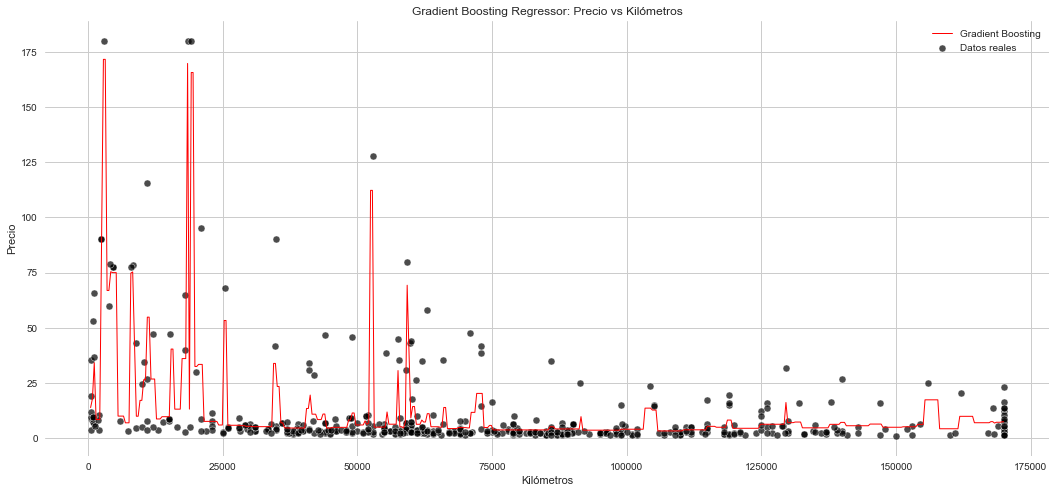

In [86]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1,1)
y_range_pred = gb_model.predict(X_range)

plt.figure(figsize=(18,8))
sns.scatterplot(x='Km', y='Precio', data=df, color='black', alpha=0.7, label='Datos reales')
plt.plot(X_range, y_range_pred, color='red', linewidth=1, label='Gradient Boosting')
plt.xlabel('Kil√≥metros')
plt.ylabel('Precio')
plt.title('Gradient Boosting Regressor: Precio vs Kil√≥metros')
plt.legend()
plt.show()

## ‚ùë XGBoost Regressor

Si bien el Gradient Boosting obtiene muy buenos resultados, se puede aplicar XGBoost Regressor que es una versi√≥n optimizada y 
m√°s r√°pida de Gradient Boosting. Mantiene las ventajas de Gradient Boosting y a√±ade mejoras importantes, que podr√≠a mejorar a√∫n
m√°s la precisi√≥n y la estabilidad del modelo. 

In [87]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
X = df[['Km']]
y = df['Precio']

In [ ]:
# Sentencia para crear el modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=300, # Numero de arboles
    learning_rate=0.5, # Tama√±o del paso
    max_depth=4, # Profundidad del arbol de decisi√≥n
    random_state=42
)

In [ ]:
xgb_model.fit(X, y) # Entrenar el modelo

In [ ]:
y_pred_xgb = xgb_model.predict(X)

In [ ]:
mse_xgb = mean_squared_error(y, y_pred_xgb)
print(f"MSE XGBoost: {mse_xgb:.2f}")

<div class="alert alert-warning">Con los hiperpar√°metros iniciales, arroja un MSE ligeramente superior a Gradient Boosting (‚âà 100.35), pero sigue siendo muy superior a los modelos lineales. Entonces planteo directamente un ajuste en los hiperpar√°metros (n_estimators=300, learning_rate=0.5, max_depth=4) y se obtiene un MSE ‚âà 75.77, mejorando el desempe√±o.M√°s modificaciones de hiperpar√°metros no producen mejoras significativas, indicando que el modelo est√° cerca de su capacidad √≥ptima de ajuste</div>




In [ ]:
X_range = np.linspace(df['Km'].min(), df['Km'].max(), 500).reshape(-1, 1)
y_pred_xgb_range = xgb_model.predict(X_range)

In [ ]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='Km', y='Precio', data=df, color='black', alpha=0.7, label='Datos reales')
plt.plot(X_range, y_pred_xgb_range, color='red', linewidth=1, label='XGBoost')
plt.xlabel('Kil√≥metros')
plt.ylabel('Precio')
plt.title('XGBoost Regressor: Precio vs Kil√≥metros')
plt.legend()
plt.show()

## <div style = 'background-color:black'> <center><font color='white'>‚ë£ Conclusiones </font></div>
  
#### Entre los modelos evaluados ‚Äî√Årboles de decisi√≥n, Random Forest, K-Nearest Neighbors y Naive Bayes, EL de Random Forest se destac√≥ por ofrecer la mejor precisi√≥n y un bajo ratio de errores, por lo que se recomienda utilizar este algoritmo para futuras predicciones, asegurando resultados confiables y consistentes para este conjunto de datos.

#### En cuanto a la importancia de los predictores, la variable ‚ÄúIncome‚Äù (ingresos) result√≥ ser la m√°s influyente, seguida a distancia por el nivel de educaci√≥n de los clientes.

#### Recomendaciones para la entidad bancaria: Centrar los esfuerzos de an√°lisis en determinar con precisi√≥n el nivel de ingresos de los clientes, ya que es el factor m√°s determinante para la aceptaci√≥n de pr√©stamos. Considerar tambi√©n el nivel de educaci√≥n como segundo factor relevante.

#### Aplicando este enfoque, ser√° posible optimizar la asignaci√≥n de cr√©ditos, reduciendo la probabilidad de errores como falsos negativos y mejorando la eficiencia en la toma de decisiones crediticias.

In [ ]:
# Sentencia para poner los kilometros del auto que deseo predecir el precio
km_nuevo = np.array([[126000]])  

In [ ]:
precio_predicho = xgb_model.predict(km_nuevo)

In [ ]:
print(f"Precio estimado para un auto con {km_nuevo[0][0]} km: ${precio_predicho[0] * 1200:.2f}")
# Multiplicado por 1200 para representar el valor en pesos.

Estos resultados son teniendo en cuenta los campos Km y Precio, pero como ya tengo el modelo a utilizar, puedo plantear que
el algoritmo tenga en cuenta mas variables con lo que se va a obtener mejores respuestas.

In [ ]:
df.sample(2)

In [ ]:
df.dtypes

In [ ]:
df.Motor.value_counts()

In [ ]:
# En este caso hay 3 tipos de carroceria que voy a eliminar y agregar en otras mas representativas.
df.Motor = df.Motor.replace(["TURBO"], "1.6")
df.Motor = df.Motor.replace(["TOYOTA 2.8"], "2.8")
df.Motor = df.Motor.replace(["3.0 TD"], "3.0")
df.Motor = df.Motor.replace(["2.8tdi 223cv"], "2.8")
df.Motor = df.Motor.replace(["1.6 MSI Nafta"], "2.8")

In [ ]:
df.Motor.value_counts()

In [ ]:
print(df['Motor'].unique())
print(df['Motor'].dtype)

In [ ]:
X = df[['Km', 'Motor']] # Agrego mas campos (solo num√©ricos)
y = df['Precio']

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.5,
    max_depth=4,
    enable_categorical=True,  # üëà clave
    random_state=42
)

In [ ]:
xgb_model.fit(X, y) # Entrenar el modelo